### Research Objectives:
1. Determine the relationship between the students’ debugging scores and the quality of discourse
2. Determine the performance distribution given the respective achievement level of the pair programmers

#### Relationship between students’ debugging performances with respect to his/her discourse quality
- Correlate the debugging scores and discourse quality such as the discourse classes and volume
- Fit a regression model and determine levels of contribution of variables to the debugging score
- Replicate the aforementioned steps but using differences of debugging scores of the pair programmers

### to try:
- group acts by main acts: inf, res, imp, eli, arg
- group by sex
- group by dynamic, static

In [1]:
# Importing packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

/home/jerelyn/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Directories
data_dir = "data/"
data_proc_dir = data_dir + "proc/"

In [3]:
stud_df = pd.read_csv(data_proc_dir + "student_data.csv", index_col="student").dropna()

In [4]:
stud_df.head()

,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,ImpAct,...,ResDen,ResSol,ResStm,school,static_or_dynamic,individual_or_pair,gender,pre_test_score,self_efficacy,debugging_scores
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,4.0,...,0.0,1.0,1.0,ADDU,Dynamic,Pair,M,8.0,5.53,25.0
ADDU-DP01B,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,3.0,2.0,ADDU,Dynamic,Pair,M,9.0,5.56,22.0
ADDU-DP03A,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,ADDU,Dynamic,Pair,M,8.0,5.06,17.0
ADDU-DP03B,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,ADDU,Dynamic,Pair,F,4.0,3.53,10.0
ADDU-DP07A,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,6.0,...,0.0,1.0,5.0,ADDU,Dynamic,Pair,M,5.0,3.78,19.0


In [5]:
cols_classes = ['ArgCcl', 'ArgCnt', 'ArgCon', 'ArgEla', 'ArgRsn', 'EliOpn', 'EliPrp', 'EliSet', 'EliVer',
                'ImpAct', 'ImpFoc', 'InfAct', 'InfNeg', 'InfNeu', 'InfNon', 'InfPos', 'InfSoc', 'InfSol',
                'InfStm', 'ResCfm', 'ResDen','ResSol', 'ResStm']
class_group = ['Arg', 'Eli', 'Imp', 'Inf', 'Res']
cols_classes_groups = ['grp_' + grp for grp in class_group]
cols_tests = ['pre_test_score', 'self_efficacy', 'debugging_scores']

In [6]:
for group in class_group:
    stud_df['grp_' + group] = stud_df[stud_df.columns[pd.Series(stud_df.columns).str.startswith(group)]].sum(1)
    
stud_df[cols_classes_groups + cols_classes]

,grp_Arg,grp_Eli,grp_Imp,grp_Inf,grp_Res,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,...,InfNeu,InfNon,InfPos,InfSoc,InfSol,InfStm,ResCfm,ResDen,ResSol,ResStm
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,1.0,7.0,7.0,18.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0
ADDU-DP01B,0.0,3.0,4.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,3.0,5.0,4.0,0.0,3.0,2.0
ADDU-DP03A,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
ADDU-DP03B,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
ADDU-DP07A,0.0,5.0,7.0,23.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,7.0,0.0,5.0,7.0,0.0,1.0,5.0
ADDU-DP07B,1.0,17.0,5.0,23.0,11.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,3.0,12.0,4.0,4.0,0.0,7.0,0.0
ADDU-DP08A,0.0,9.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
ADDU-DP08B,0.0,1.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0
ADDU-SP01A,0.0,2.0,3.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,3.0


## Correlation

<<<<<<< local <modified: text/plain>


>>>>>>> remote <removed>


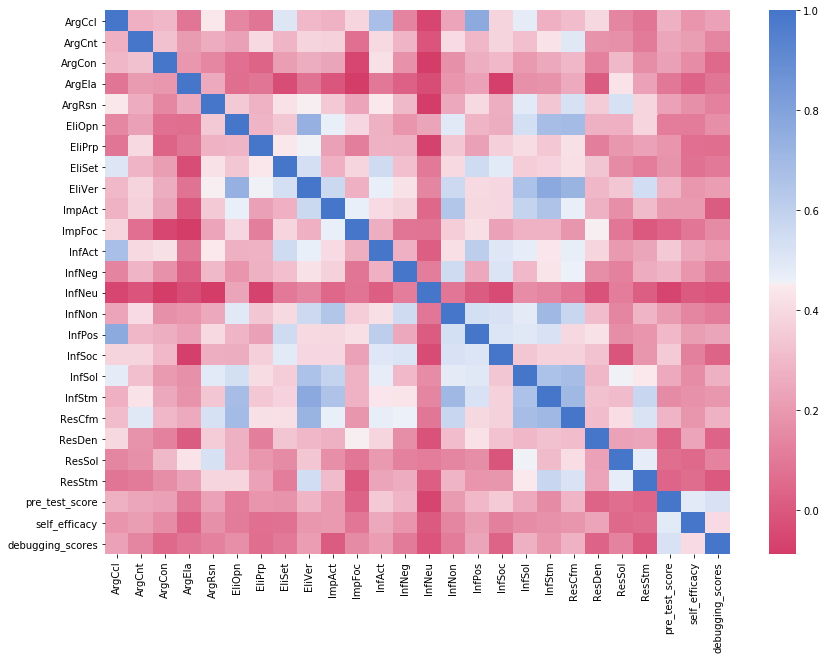

In [7]:
def showCorrelatioMatrix(data, columns):
    plt.figure(figsize=(14,10))
    cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
    corr_res = data[columns].corr()
    sns.heatmap(corr_res, cmap=cmap)

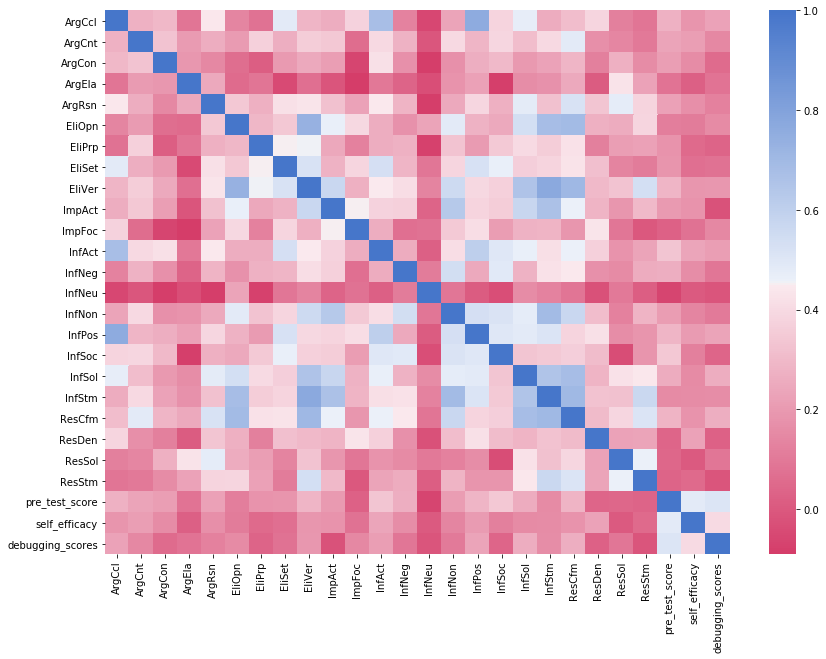

In [8]:
showCorrelatioMatrix(stud_df, cols_classes + cols_tests)

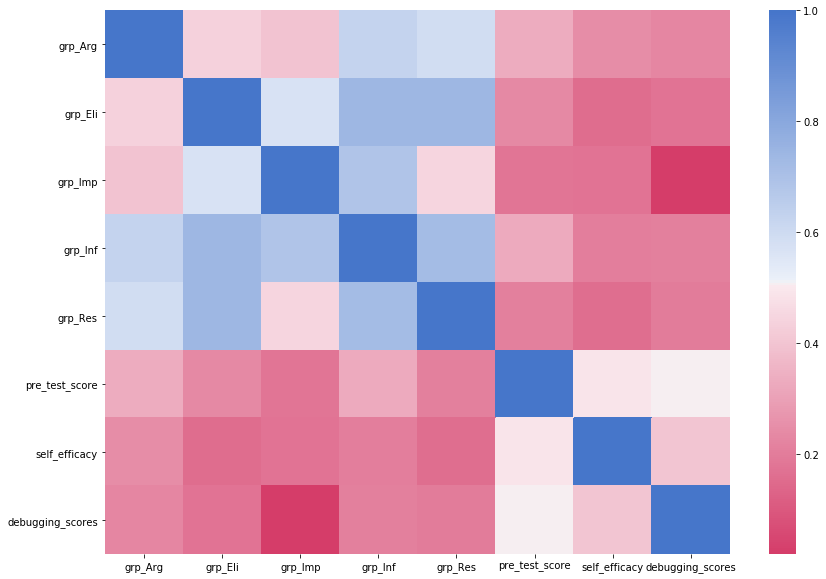

In [9]:
showCorrelatioMatrix(stud_df, cols_classes_groups + cols_tests)

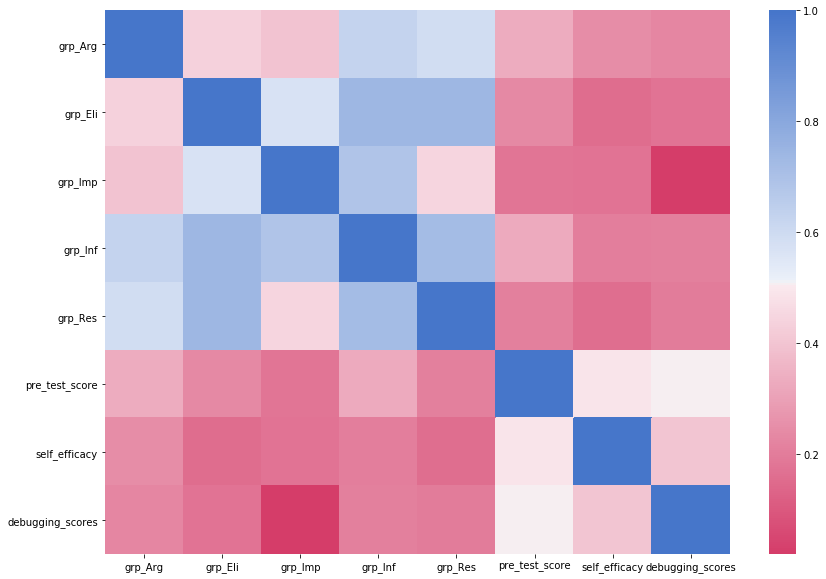

In [8]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = stud_df[cols_classes_groups+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

/home/jerelyn/miniconda3/lib/python3.6/site-packages/matplotlib-2.1.1+1053.g3bb328f-py3.6-linux-x86_64.egg/matplotlib/contour.py:950: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


AttributeError: module 'seaborn' has no attribute 'scatterplot'

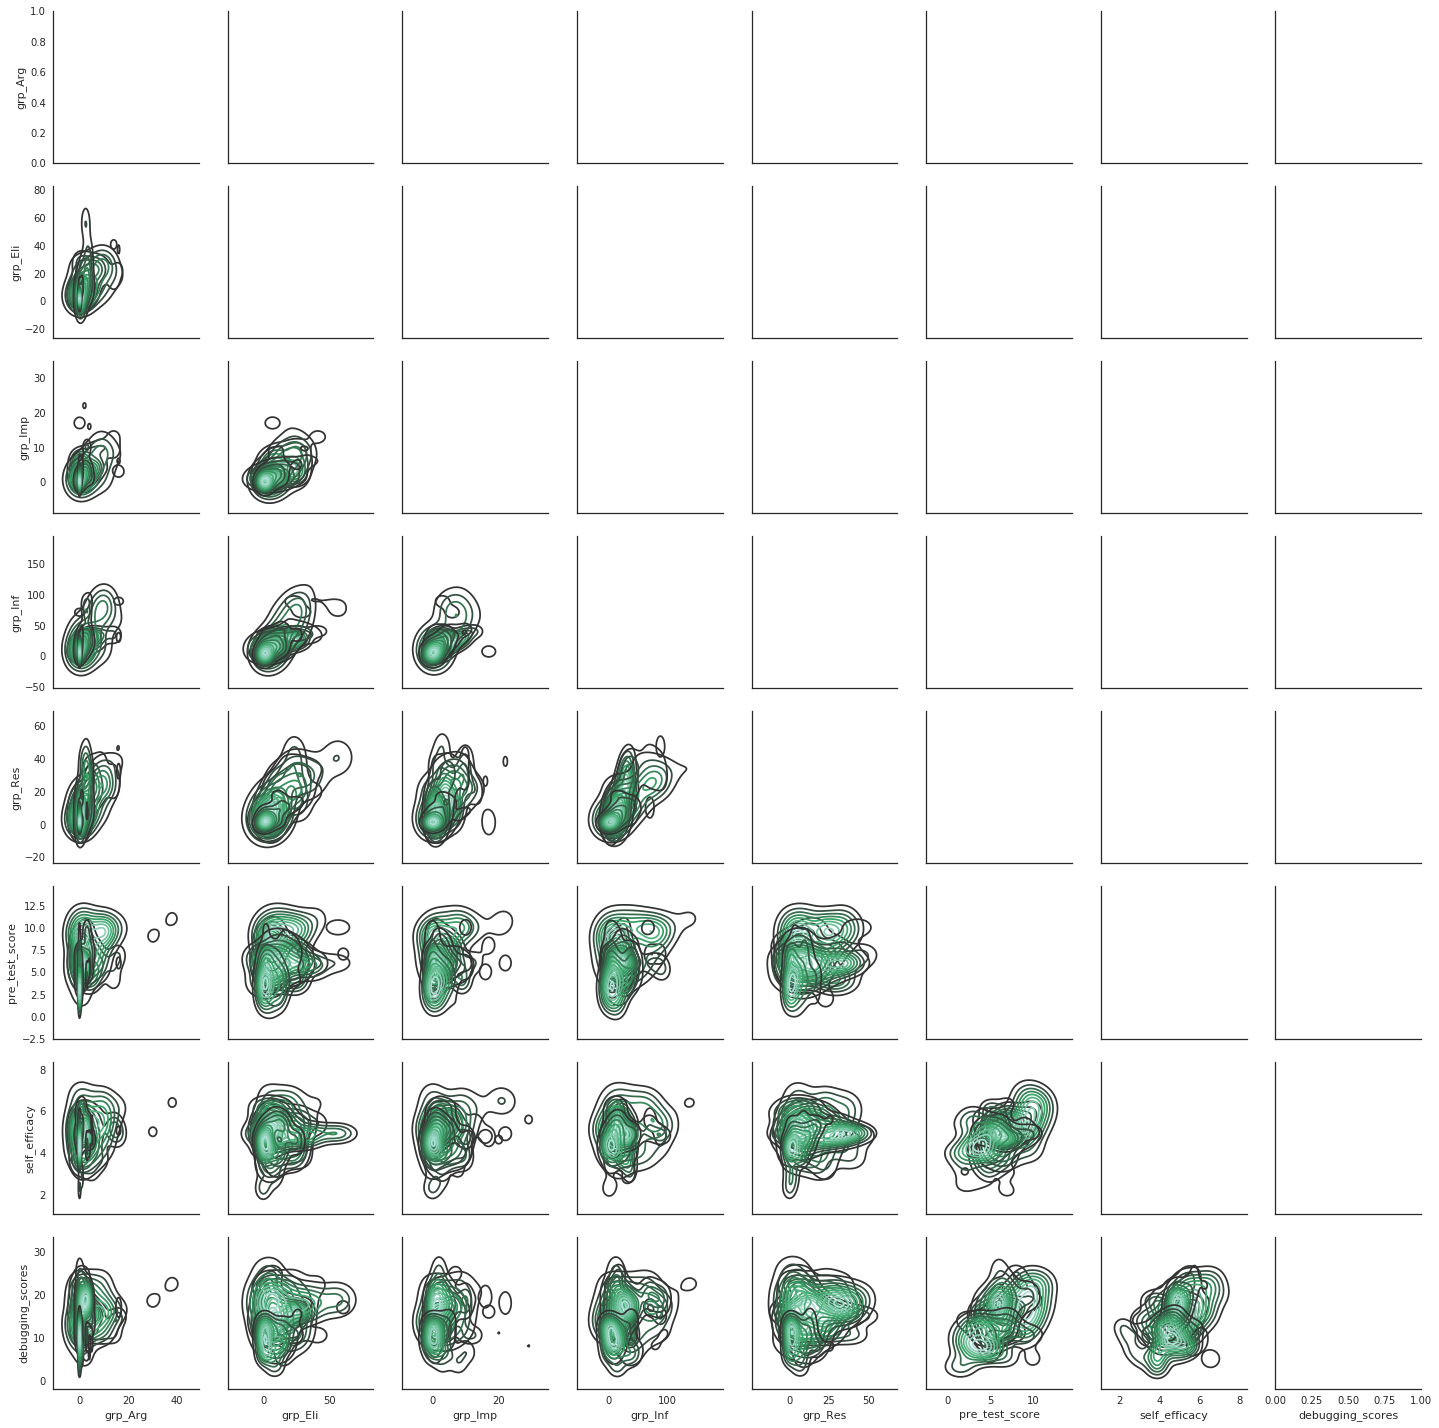

In [10]:
def showPairGrid(data, columns, hue):
    plt.figure(figsize=(14,10))

    sns.set(style="white")

    g = sns.PairGrid(data[columns], hue=hue, diag_sharey=False)
    g.map_lower(sns.kdeplot)
    g.map_upper(sns.scatterplot)
    g.map_diag(sns.kdeplot, lw=3)
    g.add_legend()

<Figure size 1008x720 with 0 Axes>

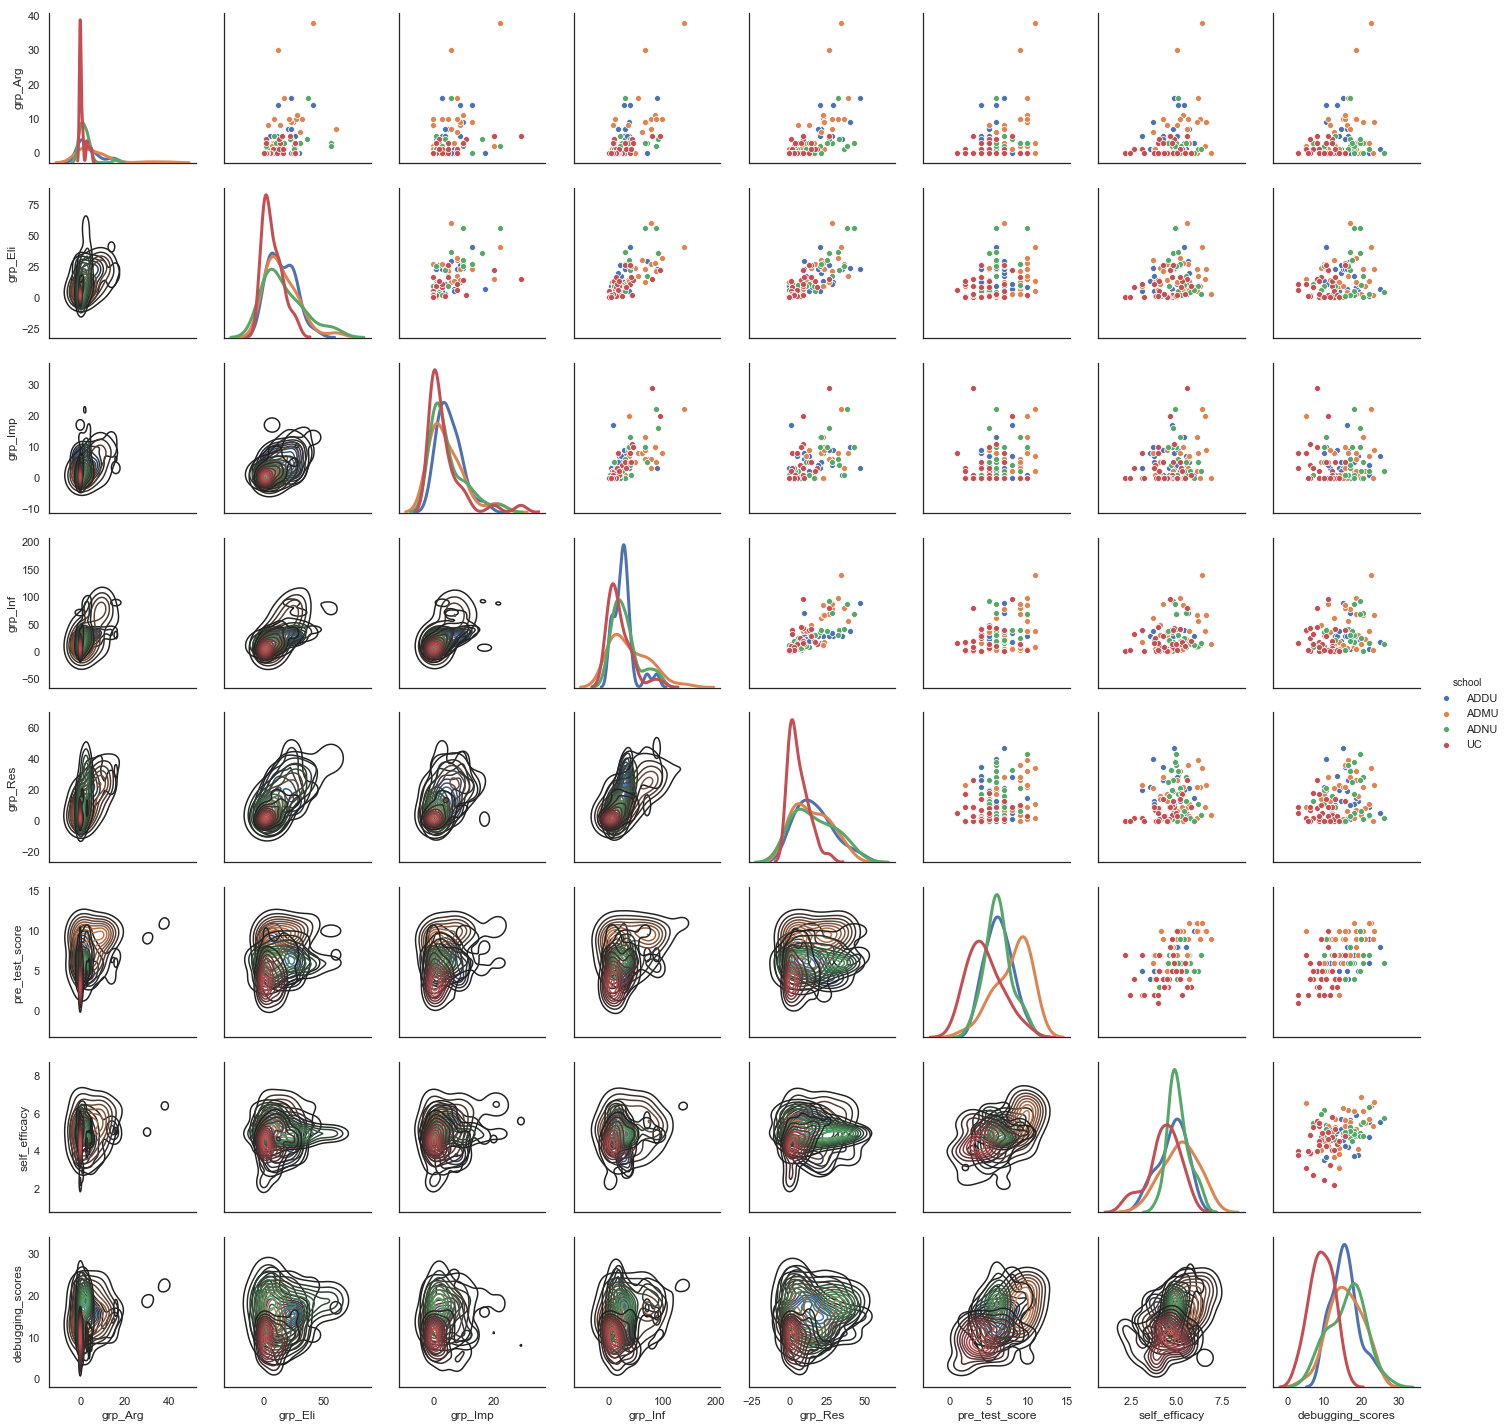

In [11]:
showPairGrid(stud_df, cols_classes_groups+cols_tests + ['school'], 'school')

## Training Prep

In [18]:
# pred vs actual viz
def pred_vs_actual_viz():
    start = min(min(y_test), min(y_pred)) - 10 # minus 10 for buffer
    end = max(max(y_test), max(y_pred)) + 10 # added 10 for buffer
    line_coordinates = np.arange(start,end)

    plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.xlim(start, end)
    plt.ylim(start, end)
    plt.plot(line_coordinates,line_coordinates)
    plt.show()
    print("MSE: {}".format(metrics.mean_squared_error(y_pred, y_test)))

In [19]:
def trainPrep(data, x_cols, y_col):
    #setting x and y
    X = stud_df[x_cols]
    y = stud_df[y_col]
    
    # Train-test split
    # !! Important to split the data first to train-test before cross validation to avoid data leakage
    train_perc = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_perc)

    X_train.reset_index(inplace=True, drop=True)
    y_train = y_train.values
    X_test.reset_index(inplace=True, drop=True)
    y_test = y_test.values


    print("Train set shape: {}".format(X_train.shape))
    print("Test set shape: {}".format(X_test.shape))
    
    # Scaling predictors (X_train)
    scaler = preprocessing.MinMaxScaler()
    scaled = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(scaled, columns=X_train.columns)
    
    return X_train, X_test, y_train, y_test, scaler

In [173]:
# Train-test split
# !! Important to split the data first to train-test before cross validation to avoid data leakage
train_perc = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_perc)
# train_idx = int(X.shape[0] * train_perc)
# X_train, y_train = X.iloc[:train_idx], y.iloc[:train_idx]
# X_test, y_test = X.iloc[train_idx:], y.iloc[train_idx:]

X_train.reset_index(inplace=True, drop=True)
y_train = y_train.values
X_test.reset_index(inplace=True, drop=True)
y_test = y_test.values


print("Train set shape: {}".format(X_train.shape))
print("Test set shape: {}".format(X_test.shape))

Train set shape: (89, 25)
Test set shape: (23, 25)


## Regression

In [37]:
def useRegression(X_train, X_test, y_train, y_test, scaler, print_summary = True):
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit() # with constant
    y_pred = model.predict(scaler.fit_transform(sm.add_constant(X_test)))

    print(model.summary())
    
    return y_pred

In [38]:
def useRegressionWithoutConstant(X_train, X_test, y_train, y_test, scaler, print_summary=True):
    model = sm.OLS(y_train, X_train).fit() # without constant
    y_pred = model.predict(scaler.fit_transform(X_test))

    print(model.summary())
    
    return y_pred

### Regression using action categories and other test scores, dependent variable is debugging score

In [39]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = stud_df, x_cols = cols_classes + ['pre_test_score', 'self_efficacy'], y_col = 'debugging_scores')
y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

Train set shape: (89, 25)
Test set shape: (23, 25)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3.307
Date:                Sun, 09 Sep 2018   Prob (F-statistic):           6.49e-05
Time:                        19:34:07   Log-Likelihood:                -233.51
No. Observations:                  89   AIC:                             519.0
Df Residuals:                      63   BIC:                             583.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

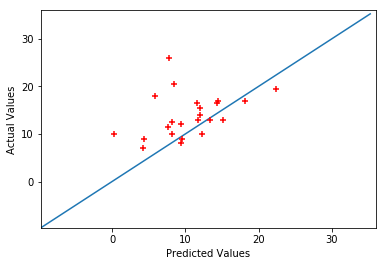

MSE: 37.63554802028469


In [40]:
pred_vs_actual_viz()

### Regression using action categories and other test scores, dependent variable is debugging score without constant

In [41]:
y_pred = useRegressionWithoutConstant(X_train, X_test, y_train, y_test, scaler)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     37.86
Date:                Sun, 09 Sep 2018   Prob (F-statistic):           2.41e-29
Time:                        19:34:13   Log-Likelihood:                -243.83
No. Observations:                  89   AIC:                             537.7
Df Residuals:                      64   BIC:                             599.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ArgCcl            -3.4597      9.089     -0.

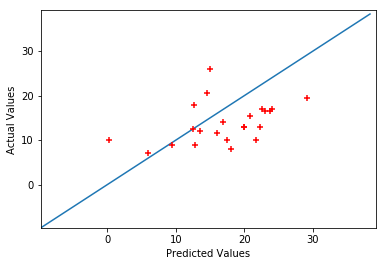

MSE: 47.817658155812204


In [42]:
pred_vs_actual_viz()

### Regression using action categories, dependent variable is debugging score

In [49]:
X_train = X_train.drop(['pre_test_score', 'self_efficacy'], axis=1)
X_test = X_test.drop(['pre_test_score', 'self_efficacy'], axis=1)

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1.596
Date:                Sun, 09 Sep 2018   Prob (F-statistic):             0.0727
Time:                        19:45:45   Log-Likelihood:                -250.88
No. Observations:                  89   AIC:                             549.8
Df Residuals:                      65   BIC:                             609.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7819      0.938     13.624      0.0

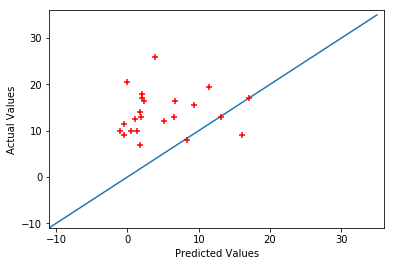

MSE: 125.25174833791621


In [50]:
pred_vs_actual_viz()

### Regression using action categories and other test scores, dependent variable is debugging score without constant

In [51]:
y_pred = useRegressionWithoutConstant(X_train, X_test, y_train, y_test, scaler)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     7.159
Date:                Sun, 09 Sep 2018   Prob (F-statistic):           1.49e-10
Time:                        19:46:02   Log-Likelihood:                -310.94
No. Observations:                  89   AIC:                             667.9
Df Residuals:                      66   BIC:                             725.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ArgCcl       -33.3600     18.561     -1.797      0.0

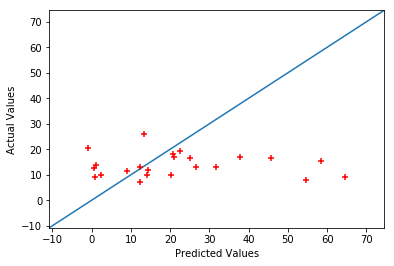

MSE: 443.9347814984517


In [52]:
pred_vs_actual_viz()

### Other tests

In [78]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = stud_df, x_cols = cols_classes, y_col = 'pre_test_score')
y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

Train set shape: (89, 23)
Test set shape: (23, 23)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1.511
Date:                Sun, 09 Sep 2018   Prob (F-statistic):             0.0991
Time:                        19:57:31   Log-Likelihood:                -185.43
No. Observations:                  89   AIC:                             418.9
Df Residuals:                      65   BIC:                             478.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

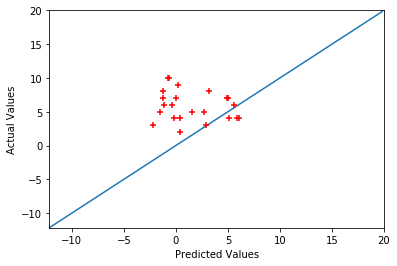

MSE: 33.04830375485383


In [79]:
pred_vs_actual_viz()

In [81]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = stud_df, x_cols = cols_classes, y_col = 'self_efficacy')
y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

Train set shape: (89, 23)
Test set shape: (23, 23)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.057
Date:                Sun, 09 Sep 2018   Prob (F-statistic):              0.414
Time:                        19:58:33   Log-Likelihood:                -98.748
No. Observations:                  89   AIC:                             245.5
Df Residuals:                      65   BIC:                             305.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [176]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() # with constant
y_pred = model.predict(scaler.fit_transform(sm.add_constant(X_test)))

# model = sm.OLS(y_train, X_train).fit() # without constant
# y_pred = model.predict(scaler.fit_transform(X_test))

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     3.333
Date:                Sun, 09 Sep 2018   Prob (F-statistic):           5.85e-05
Time:                        18:15:12   Log-Likelihood:                -231.46
No. Observations:                  89   AIC:                             514.9
Df Residuals:                      63   BIC:                             579.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.6739      1.551      4.302      0.000       3.574       9.774
ArgCcl           -12.0426      8.346     -1.443      0.154     -28.720       4.635
ArgCnt            -0.3641      2.679     -0.136      0.892      -5.717       4.989
ArgCon            -0.5480      2.290     -0.239      0.812      -5.125       4.029
ArgEla            -1.8745      4.284     -0.438      0.663     -10.436       6.687
ArgRsn            -0.9617      2.847     -0.338      0.737      -6.651       4.728
EliOpn            -7.9078      4.959     -1.595      0.116     -17.817       2.001
EliPrp            -5.8850      3.180     -1.851      0.069     -12.239       0.469
EliSet            -4.6877      4.609     -1.017      0.313     -13.899       4.523
EliVer             3.3088      3.498      0.946      0.348      -3.682      10.299
ImpAct            -9.3786      4.100     -2.288      0.026     -17.572      -1.186
ImpFoc            10.1665      3.318      3.064      0.003       3.535      16.798
InfAct             6.7264      5.075      1.326      0.190      -3.414      16.867
InfNeg            -1.2213      4.444     -0.275      0.784     -10.101       7.659
InfNeu            -1.9266      2.927     -0.658      0.513      -7.775       3.922
InfNon            -5.1072      4.654     -1.097      0.277     -14.407       4.193
InfPos             8.4752      8.751      0.968      0.337      -9.012      25.963
InfSoc            -3.5210      3.768     -0.934      0.354     -11.050       4.008
InfSol             4.3356      3.340      1.298      0.199      -2.338      11.009
InfStm             3.3570      4.234      0.793      0.431      -5.105      11.819
ResCfm             9.3252      4.522      2.062      0.043       0.288      18.363
ResDen            -3.9831      3.135     -1.271      0.209     -10.247       2.281
ResSol            -0.3374      2.492     -0.135      0.893      -5.318       4.643
ResStm            -4.3026      3.018     -1.425      0.159     -10.334       1.729
pre_test_score    10.0199      2.526      3.966      0.000       4.972      15.068
self_efficacy      4.8638      2.924      1.663      0.101      -0.979      10.707
==============================================================================
Omnibus:                        2.187   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.552
Skew:                           0.217   Prob(JB):                        0.460
Kurtosis:                       3.480   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<<<<<<< local


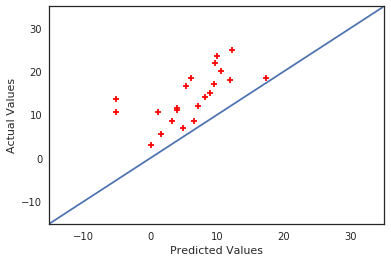

MSE: 86.59126664456728


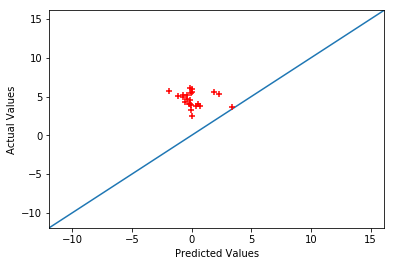

MSE: 23.000380634639942


>>>>>>> remote


MSE: 79.0214720534741


In [ ]:
pred_vs_actual_viz()

## Difference in testing scores

In [ ]:
temp_remove_pair = {'ADDU-DP02', 'ADDU-SP04'} 
unique_pairs = set(stud_df.index.str[:-1]) - temp_remove_pair
pair_df = pd.DataFrame(index=unique_pairs, columns=cols_classes + cols_tests + ['school', 'static_or_dynamic', 'gender'])

for pair in unique_pairs:
    pair_df.loc[pair][cols_tests] = stud_df.loc[pair + 'A'].get(cols_tests).subtract(stud_df.loc[pair + 'B'].get(cols_tests)).abs()
    pair_df.loc[pair][cols_classes] = stud_df.loc[pair + 'A'].get(cols_classes).add(stud_df.loc[pair + 'B'].get(cols_classes))
    pair_df.loc[pair][['school', 'static_or_dynamic', 'gender']] = stud_df.loc[pair + 'A'][['school', 'static_or_dynamic', 'gender']]
    
pair_df[cols_classes + cols_tests] = pair_df[cols_classes + cols_tests].apply(pd.to_numeric, errors='coerce', axis=1)

In [20]:
pair_df

,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,ImpAct,...,ResCfm,ResDen,ResSol,ResStm,pre_test_score,self_efficacy,debugging_scores,school,static_or_dynamic,gender
ADMU-DPx2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.435484,1.0,ADMU,Dynamic,F
ADMU-SP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,0.593750,0.5,ADMU,Static,M
ADNU-DP07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.090000,5.0,ADNU,Dynamic,F
ADNU-SP07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.530000,0.5,ADNU,Static,F
ADDU-DP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.030000,3.0,ADDU,Dynamic,M
ADMU-SPx1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.281250,0.0,ADMU,Static,M
ADMU-DP02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.187500,9.0,ADMU,Dynamic,M
ADNU-DP02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.690000,3.0,ADNU,Dynamic,F
ADNU-SP04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,0.280000,0.5,ADNU,Static,M
ADNU-DP01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.940000,8.0,ADNU,Dynamic,M


<<<<<<< local <modified: text/plain>


>>>>>>> remote <modified: text/plain>


<<<<<<< local


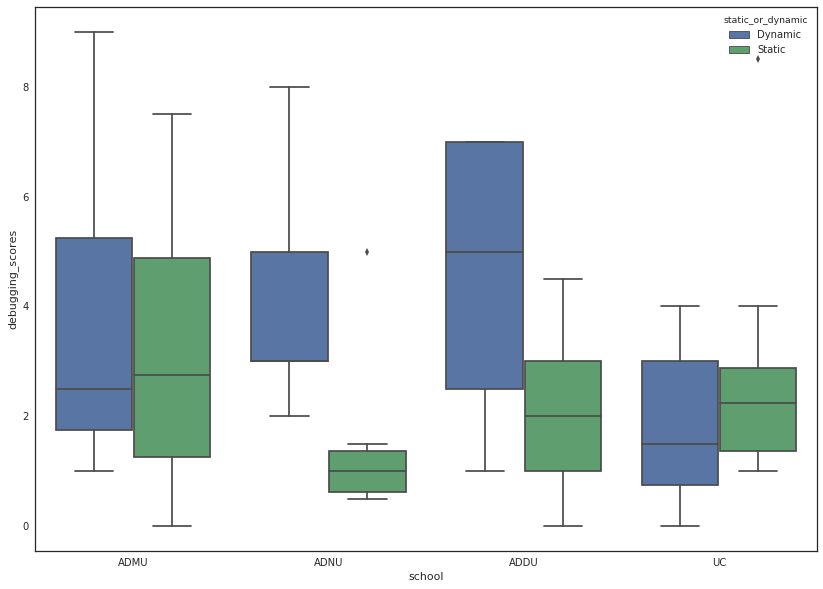

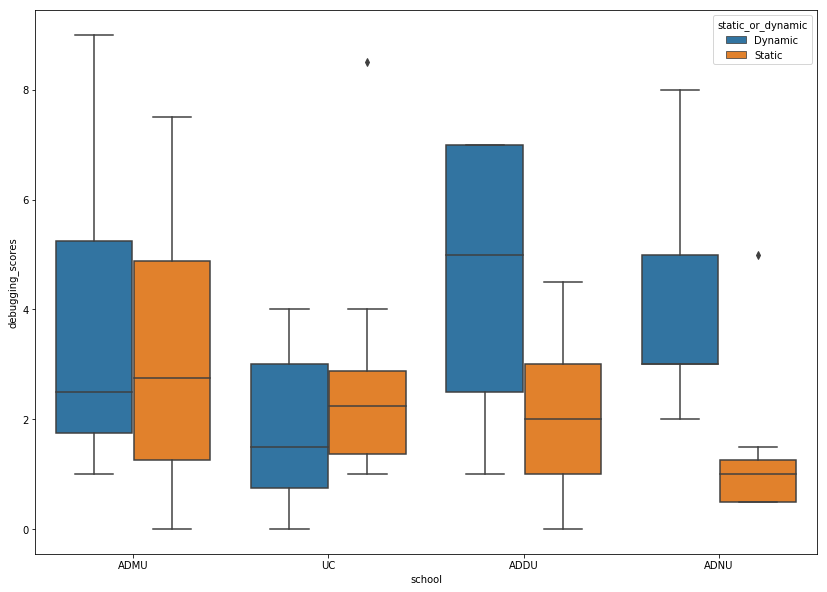

>>>>>>> remote


In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='school', y='debugging_scores', hue='static_or_dynamic',  data=pair_df)

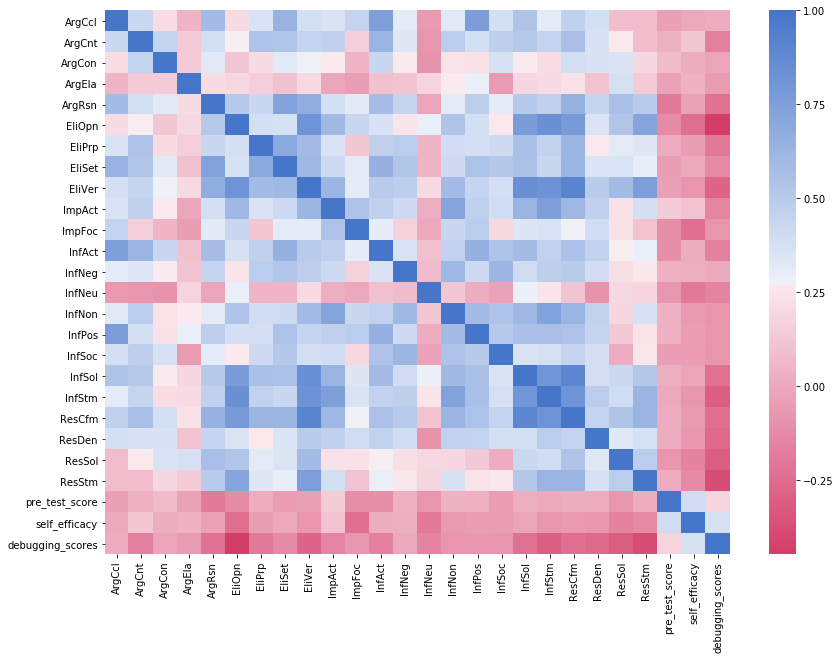

In [62]:
showCorrelatioMatrix(pair_df, cols_classes+cols_tests)

In [63]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = pair_df, x_cols = cols_classes , y_col = 'debugging_scores')

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

Train set shape: (89, 23)
Test set shape: (23, 23)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1.387
Date:                Sun, 09 Sep 2018   Prob (F-statistic):              0.153
Time:                        19:51:24   Log-Likelihood:                -244.62
No. Observations:                  89   AIC:                             537.2
Df Residuals:                      65   BIC:                             597.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

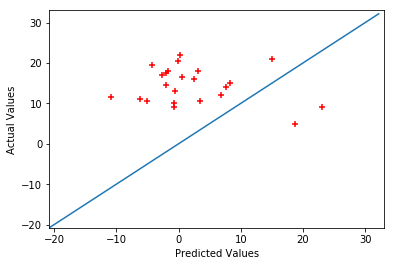

MSE: 241.46823136271948


In [61]:
pred_vs_actual_viz()

In [66]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = pair_df, x_cols = cols_classes , y_col = 'pre_test_score')

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

Train set shape: (89, 23)
Test set shape: (23, 23)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     1.467
Date:                Sun, 09 Sep 2018   Prob (F-statistic):              0.116
Time:                        19:53:36   Log-Likelihood:                -183.09
No. Observations:                  89   AIC:                             414.2
Df Residuals:                      65   BIC:                             473.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

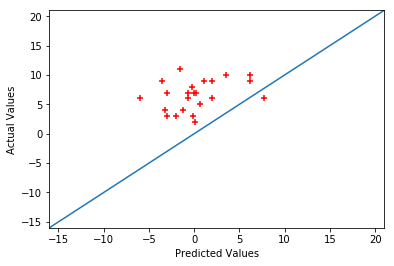

MSE: 52.06327929516523


In [67]:
pred_vs_actual_viz()

In [68]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = pair_df, x_cols = cols_classes , y_col = 'self_efficacy')

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

Train set shape: (89, 23)
Test set shape: (23, 23)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                    0.6743
Date:                Sun, 09 Sep 2018   Prob (F-statistic):              0.853
Time:                        19:54:30   Log-Likelihood:                -100.19
No. Observations:                  89   AIC:                             248.4
Df Residuals:                      65   BIC:                             308.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

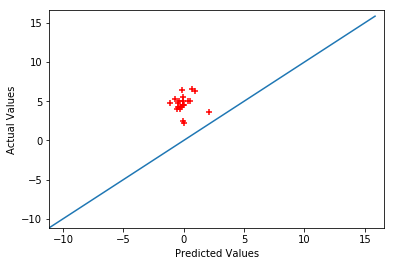

MSE: 23.169866708988444


In [69]:
pred_vs_actual_viz()

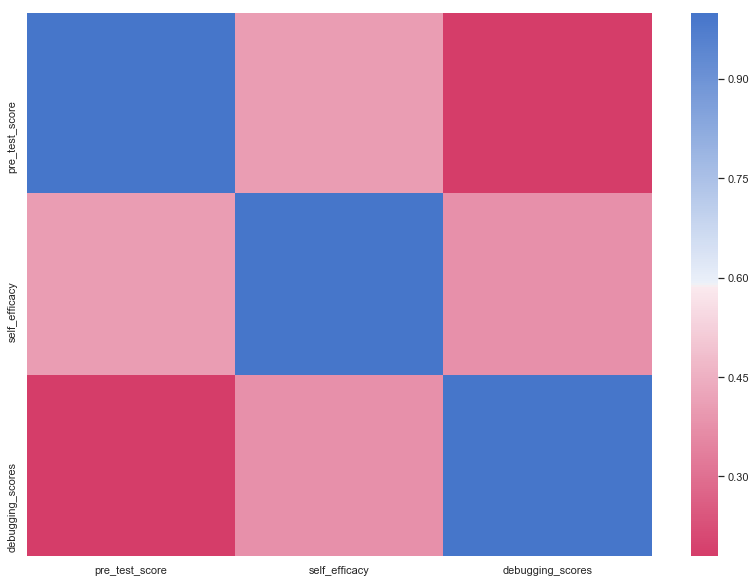

In [190]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = pair_df[cols_classes+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

In [161]:
stud_df['static_or_dynamic']

student
ADDU-DP01A    Dynamic
ADDU-DP01B    Dynamic
ADDU-DP02A    Dynamic
ADDU-DP03A    Dynamic
ADDU-DP03B    Dynamic
ADDU-DP07A    Dynamic
ADDU-DP07B    Dynamic
ADDU-DP08A    Dynamic
ADDU-DP08B    Dynamic
ADDU-SP01A     Static
ADDU-SP01B     Static
ADDU-SP02A     Static
ADDU-SP02B     Static
ADDU-SP03A     Static
ADDU-SP03B     Static
ADDU-SP04A     Static
ADDU-SP05A     Static
ADDU-SP05B     Static
ADDU-SP06A     Static
ADDU-SP06B     Static
ADDU-SP07A     Static
ADDU-SP07B     Static
ADDU-SP08A     Static
ADDU-SP08B     Static
ADMU-DP01A    Dynamic
ADMU-DP01B    Dynamic
ADMU-DP02A    Dynamic
ADMU-DP02B    Dynamic
ADMU-DP03A    Dynamic
ADMU-DP03B    Dynamic
               ...   
UC-DP02A      Dynamic
UC-DP02B      Dynamic
UC-DP03A      Dynamic
UC-DP03B      Dynamic
UC-DP04A      Dynamic
UC-DP04B      Dynamic
UC-DP05A      Dynamic
UC-DP05B      Dynamic
UC-DP06A      Dynamic
UC-DP06B      Dynamic
UC-DP07A      Dynamic
UC-DP07B      Dynamic
UC-DP08A      Dynamic
UC-DP08B      Dynamic
UC

M    74
F    38
Name: gender, dtype: int64